In [136]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import griddata
pi = 3.141592
m = 1
gamma = 0

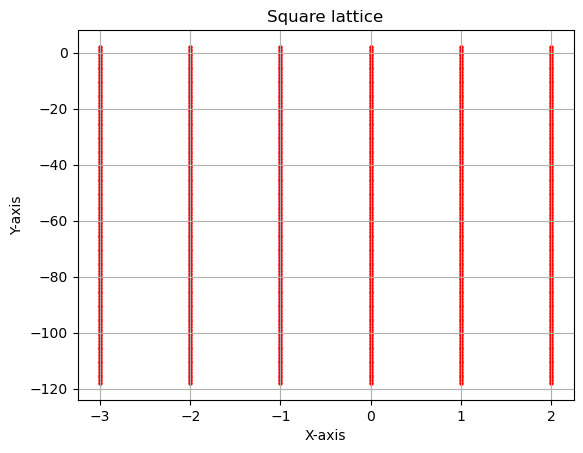

In [141]:
# Defining the Base lattice  - (SQUARE LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [0, 1]

# Dimensions
lamda = 2 # skyrmion radius
D = 30 # no. of Skyrmions in the nano-ribbon unitcell

# Lattice generation and visualization
sqX_x = []
sqX_y = []
for col in range(-((D-1)*2*lamda)-lamda, lamda + 1):
    for row in range(-lamda -1 , lamda + 1 ):
        sqX_x.append((A1[0] * row) + (A2[0] * col))
        sqX_y.append((A1[1] * row) + (A2[1] * col))
#print(sqX_x)
#print(sqX_y)
# Plot the points
g = plt.figure();
plt.scatter(sqX_x, sqX_y, color='red', s=5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square lattice')
plt.grid(True)
plt.show()

In [142]:
# Flatten the position matrix into tuples
pos = [(col - lamda, lamda - row) for row in range(2 * lamda) for col in range(2 * lamda)]
#print(pos)

# distance array
r = [np.sqrt((pos[i][0])**2 + (pos[i][1])**2) for i in range((2*lamda)**2)]
#print(r)

# theta array
theta = [] 
for i in range((2*lamda)**2):
    if r[i] <= lamda :
        theta.append(np.pi*(1 - (r[i])/lamda))
    else :
        theta.append(0) 
#print(theta)

# alpha array calculation(radians):
alpha = []
for i in range((2*lamda)**2):   
    x = pos[i][0] 
    y = pos[i][1]
    if x==0 and y==0:
        alpha.append(0) 
    elif x == 0 and y > 0:
        alpha.append(np.pi/2) 
    elif x == 0 and y < 0:
        alpha.append(3*np.pi/2) 
    elif y == 0 and x > 0:
        alpha.append(0)
    elif y == 0 and x < 0:
        alpha.append(np.pi)   
    elif x > 0 and y > 0:
        alpha.append(np.arctan(y/x)) #first quadrant
    elif x < 0 and y < 0:
        alpha.append(np.pi + np.arctan(y/x)) #third quadrant
    elif x > 0 and y < 0:
        alpha.append(2*np.pi - np.arctan(abs(y/x))) #fourth quadrant 
    elif x < 0 and y > 0: 
        alpha.append((np.pi/2) + np.arctan(abs(y/x))) #second quadrant
#print(alpha) 

#phi definition 
phi = [(m * alpha[i]) + gamma for i in range((2*lamda)**2)]
#print(phi) 

484


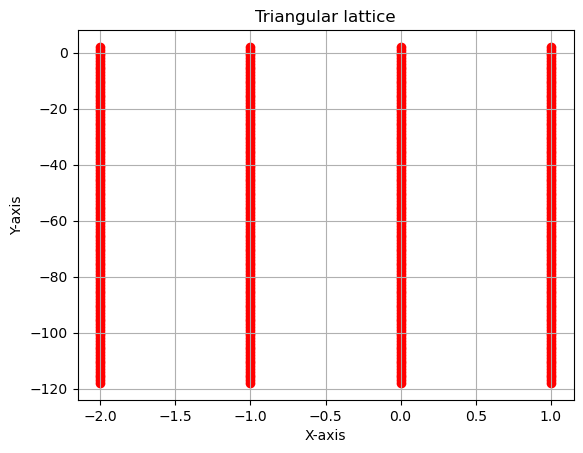

In [143]:
# unit cell of the skyrmion nano-ribbon
unitcell_x = []
unitcell_y = []
# Bounds of unit cell
Xlow = -lamda - 0.5
Xhigh = lamda - 0.5
Ylow = -((2*D) + 1)*lamda  - 0.5
Yhigh = lamda + 0.5
for i in range(len(sqX_x)):
    [x, y] = [sqX_x[i], sqX_y[i]]
    if x >= Xlow and x < Xhigh and y >= Ylow and y < Yhigh:
        unitcell_x.append(x)  
        unitcell_y.append(y)

#print(unitcell_x)
print(len(unitcell_y))

g = plt.figure();
plt.scatter(unitcell_x, unitcell_y, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [144]:
# skyrmion profile for the nano-ribbon unit cell

def index(x, y, m):
    for j in range((2*lamda)**2):
        x1 = pos[j][0]
        y1 = pos[j][1]
        if [x, y + 2*lamda*m] == [x1, y1]:
            prof_index.append(j)
    return

prof_index = []
for i in range(len(unitcell_x)):
    x = unitcell_x[i]
    y = unitcell_y[i]
    for m in range(D+1):
        index(x, y, m)
    
print(len(prof_index))
#print(prof_index)

484


In [145]:
# eigen ket and bra vectors
chi_ket = []
chi_bra = []
for i in range(len(unitcell_x)):
    m = prof_index[i]
    chi_ket.append([np.cos(theta[m]/2), np.sin(theta[m]/2) * np.exp(1j * phi[m])])
    chi_bra.append([np.cos(theta[m]/2), np.sin(theta[m]/2) * np.exp(-1j * phi[m])])


In [146]:
# neighbour table formation
# translation vector
Tx = [2*lamda, 0]
D1 = [1, 0]
D2 = [-1, 0]
D3 = [0, 1]
D4 = [0, -1]
NN1 = []
NN2 = []
NN3 = []
NN4 = []

def neig_1(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D1[0] , y + D1[1]]):
        NN1.append(j)
    elif np.allclose([x1, y1], [x + D1[0] - Tx[0], y + D1[1] - Tx[1]]):
        NN1.append(j)
    return 

def neig_2(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D2[0] , y + D2[1]]):
        NN2.append(j)
    elif np.allclose([x1, y1], [x + D2[0] + Tx[0], y + D2[1] + Tx[1]]):
        NN2.append(j)
    return 

def neig_3(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D3[0] , y + D3[1]]):
        NN3.append(j)
    elif np.allclose([x1, y1],[x + D3[0] , y + D3[1] - (2*lamda*D) - 1 ]):
        NN3.append(None)
    return 

def neig_4(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D4[0] , y + D4[1]]):
        NN4.append(j)
    elif np.allclose([x1, y1],[x + D4[0] , y + D4[1] + (2*lamda*D) + 1 ]):
        NN4.append(None)
    return 

for i in tqdm(range(len(unitcell_x))):
    for j in range(len(unitcell_x)):
        neig_1(i, j)
        neig_2(i, j)
        neig_3(i, j)
        neig_4(i, j)

#print(NN1)
#print(NN2)
#print(NN3)
#print(NN4)

100%|██████████| 484/484 [00:42<00:00, 11.36it/s]


In [147]:
# Hamiltonian definition
t = 1
def H(kx):
    k = [kx, 0]
    Hij = np.zeros((len(unitcell_x),len(unitcell_x)), dtype=np.complex128)
    for i in range(len(unitcell_x)):
        n1, n2 = int(NN1[i]), int(NN2[i])  
        Hij[n1][i] = t * np.exp(1j * np.dot(k, D1)) * np.dot(chi_bra[n1], chi_ket[i])
        Hij[n2][i] = t * np.exp(1j * np.dot(k, D2)) * np.dot(chi_bra[n2], chi_ket[i])
    for i in range(len(unitcell_x)): 
        n3, n4 = NN3[i], NN4[i] 
        if n3 is not None : 
            n3 = int(n3)
            Hij[n3][i] = t * np.dot(chi_bra[n3], chi_ket[i])
        if n4 is not None :
            n4 = int(n4)
            Hij[n4][i] = t * np.dot(chi_bra[n4], chi_ket[i])
    return Hij 

In [148]:
BZ = np.linspace(-(np.pi)/((2*lamda)), (np.pi)/((2*lamda)), 100)

band = np.zeros((len(unitcell_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i]))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][i] = eigen[b_index]



100%|██████████| 100/100 [00:09<00:00, 10.98it/s]


(-0.7853981633974483, 0.7853981633974483)

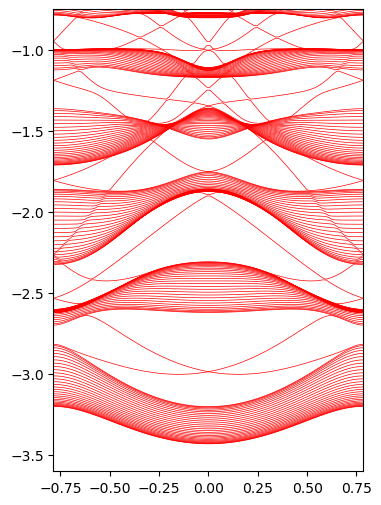

In [154]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, len(unitcell_x)):
    plt.plot( BZ, band[b_index], c = 'red', linestyle='-', linewidth = 0.5 )
plt.ylim(-3.6, -0.75)
plt.xlim(BZ[0], BZ[-1])

In [80]:
def sorted_kets(kx):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx))
    a = np.transpose(eigenvectors)
    return a

In [161]:
eigen_ket = np.zeros(len(unitcell_x), dtype=np.complex128)
for i in tqdm(range(len(BZ))):
    eigen_ket += sorted_kets(BZ[i])[29]
    
ele_prob = [(abs(eigen_ket[i])/np.linalg.norm(eigen_ket))**2 for i in range(len(unitcell_x))]


100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


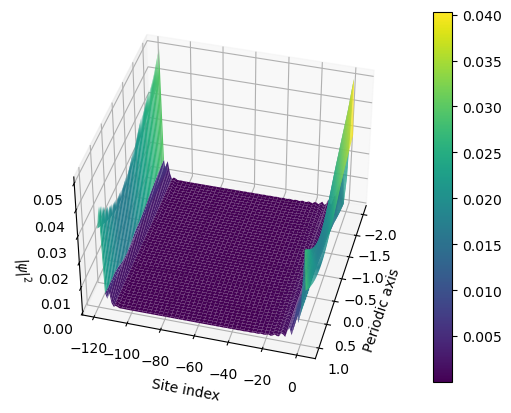

In [162]:
# Create grid values first
grid_x, grid_y = np.meshgrid(
    np.linspace(min(unitcell_x), max(unitcell_x), 100),
    np.linspace(min(unitcell_y), max(unitcell_y), 100)
)

# Interpolate z values on the grid
grid_z = griddata((unitcell_x, unitcell_y), ele_prob, (grid_x, grid_y), method='cubic')

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')

# Add labels
ax.set_xlabel('Periodic axis')
ax.set_ylabel('Site index')
ax.set_zlabel('$|\psi|^2$', rotation=-90)
ax.view_init(elev=  40, azim=15)

# Add a color bar
fig.colorbar(surf)

# Show plot
plt.show()


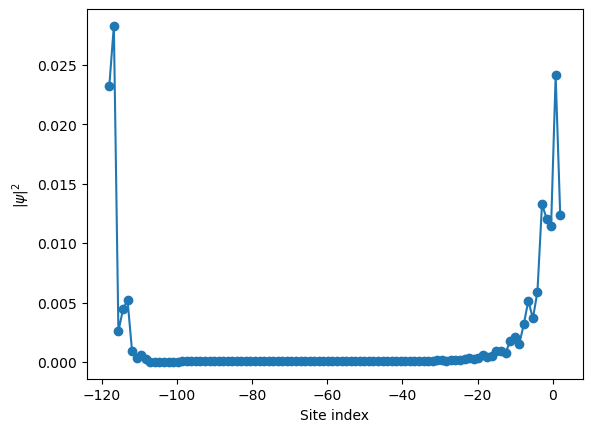

In [168]:
# Create grid values first
grid_x, grid_y = np.meshgrid(
    np.linspace(min(unitcell_x), max(unitcell_x), 100),
    np.linspace(min(unitcell_y), max(unitcell_y), 100)
)

# Interpolate z values on the grid
grid_z = griddata((unitcell_x, unitcell_y), ele_prob, (grid_x, grid_y), method='cubic')

# Find the index of x=0 in grid_x
x_index = np.where(np.isclose(grid_x[0], 0))[0][0]

# Create a figure and a 2D Axes for the slice plot
fig_slice, ax_slice = plt.subplots()
slice_y = grid_y[:, x_index]
slice_z = grid_z[:, x_index]

# Plot the slice
ax_slice.plot(slice_y, slice_z)
ax_slice.scatter(slice_y, slice_z)
ax_slice.set_xlabel('Site index')
ax_slice.set_ylabel('$|\psi|^2$')
#ax_slice.legend()

# Show the slice plot
plt.show()
